In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pib = pd.read_csv("src\\PIB-dos-Municípios-base-de-dados-2010-2021.csv") # ler arquivo

In [3]:
pib_2021 = pib[(pib['Ano'] == 2021)] # pegar os dados do pib de 2021

In [4]:
ideb = pd.read_csv("src\\divulgacao_ensino_medio_municipios_2023.csv") # ler o arquivo

In [5]:
ideb_pe = ideb[(ideb['REDE'] == 'Pública')] # pegando as es escolas oúblicas

In [6]:
# juntando as tabelas pelo nome do municipio 
todos_dados = pd.merge(
    pib_2021,
    ideb_pe,
    left_on = 'Nome do Município',
    right_on = 'NO_MUNICIPIO',
    how = 'inner'
)

In [7]:
todos_dados.drop(columns=["NO_MUNICIPIO"], inplace=True) # tira a coluna repetida

In [8]:
# selecionando as colunas desejadas
colunas_Selecionadas = ["Valor adicionado bruto da Agropecuária, a preços correntes (R$ 1.000)", "Valor adicionado bruto da Indústria, a preços correntes (R$ 1.000)",
                        "Valor adicionado bruto dos Serviços, a preços correntes - exceto Administração, defesa, educação e saúde públicas e seguridade social (R$ 1.000)",
                        "Valor adicionado bruto da Administração, defesa, educação e saúde públicas e seguridade social, a preços correntes (R$ 1.000)",
                        "Valor adicionado bruto total, a preços correntes (R$ 1.000)", "Impostos, líquidos de subsídios, sobre produtos,  a preços correntes (R$ 1.000)",
                        "Produto Interno Bruto,  a preços correntes (R$ 1.000)", "Produto Interno Bruto per capita,  a preços correntes (R$ 1,00)", "VL_APROVACAO_2021_SI_4",
                        "VL_APROVACAO_2021_1", "VL_APROVACAO_2021_2", "VL_APROVACAO_2021_3", "VL_APROVACAO_2021_4", "VL_INDICADOR_REND_2021", "VL_NOTA_MATEMATICA_2021", 
                        "VL_NOTA_PORTUGUES_2021", "VL_NOTA_MEDIA_2021", "IDEB_2021"]

In [9]:
dados_matriz = todos_dados[colunas_Selecionadas]

In [10]:
colunas = ["Valor adicionado bruto da Agropecuária, a preços correntes (R$ 1.000)", "Valor adicionado bruto da Indústria, a preços correntes (R$ 1.000)",
           "Valor adicionado bruto dos Serviços, a preços correntes - exceto Administração, defesa, educação e saúde públicas e seguridade social (R$ 1.000)",
                        "Valor adicionado bruto da Administração, defesa, educação e saúde públicas e seguridade social, a preços correntes (R$ 1.000)",
                        "Valor adicionado bruto total, a preços correntes (R$ 1.000)", "Impostos, líquidos de subsídios, sobre produtos,  a preços correntes (R$ 1.000)",
                        "Produto Interno Bruto,  a preços correntes (R$ 1.000)", "VL_APROVACAO_2021_SI_4",
                        "VL_APROVACAO_2021_1", "VL_APROVACAO_2021_2", "VL_APROVACAO_2021_3", "VL_APROVACAO_2021_4", "VL_INDICADOR_REND_2021", "VL_NOTA_MATEMATICA_2021", 
                        "VL_NOTA_PORTUGUES_2021", "VL_NOTA_MEDIA_2021", "IDEB_2021"]

In [11]:
def clean_and_convert(column):
    column = column.astype(str).str.strip()  # Remove espaços extras
    column = column.str.replace(r'[^\d,.-]', '', regex=True)  # Remove caracteres não numéricos
    column = column.str.replace(',', '.')  # Substitui vírgula por ponto
    column = column.replace(['', 'N/D', '--', 'NaN'], np.nan)  # Substitui valores problemáticos por NaN
    return pd.to_numeric(column, errors='coerce')  # Converte para numérico

# Aplicar a limpeza em todas as colunas
for coluna in colunas:
    dados_matriz[coluna] = clean_and_convert(dados_matriz[coluna])

C:\Users\mclar\AppData\Local\Temp\ipykernel_19920\829188125.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_matriz[coluna] = clean_and_convert(dados_matriz[coluna])
C:\Users\mclar\AppData\Local\Temp\ipykernel_19920\829188125.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_matriz[coluna] = clean_and_convert(dados_matriz[coluna])
C:\Users\mclar\AppData\Local\Temp\ipykernel_19920\829188125.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

In [12]:
dados_matriz['Produto Interno Bruto per capita,  a preços correntes (R$ 1,00)'] = dados_matriz['Produto Interno Bruto per capita,  a preços correntes (R$ 1,00)'].str.replace(',', '').astype(float)

C:\Users\mclar\AppData\Local\Temp\ipykernel_19920\3084012837.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_matriz['Produto Interno Bruto per capita,  a preços correntes (R$ 1,00)'] = dados_matriz['Produto Interno Bruto per capita,  a preços correntes (R$ 1,00)'].str.replace(',', '').astype(float)


In [13]:
# descobir quantas cidades tem infirmações não nulas
dados_matriz.notnull().sum()

Valor adicionado bruto da Agropecuária, a preços correntes (R$ 1.000)                                                                               6149
Valor adicionado bruto da Indústria, a preços correntes (R$ 1.000)                                                                                  5844
Valor adicionado bruto dos Serviços, a preços correntes - exceto Administração, defesa, educação e saúde públicas e seguridade social (R$ 1.000)    5681
Valor adicionado bruto da Administração, defesa, educação e saúde públicas e seguridade social, a preços correntes (R$ 1.000)                       6023
Valor adicionado bruto total, a preços correntes (R$ 1.000)                                                                                         5140
Impostos, líquidos de subsídios, sobre produtos,  a preços correntes (R$ 1.000)                                                                     5995
Produto Interno Bruto,  a preços correntes (R$ 1.000)                             

In [14]:
matriz = dados_matriz.corr(method='spearman')

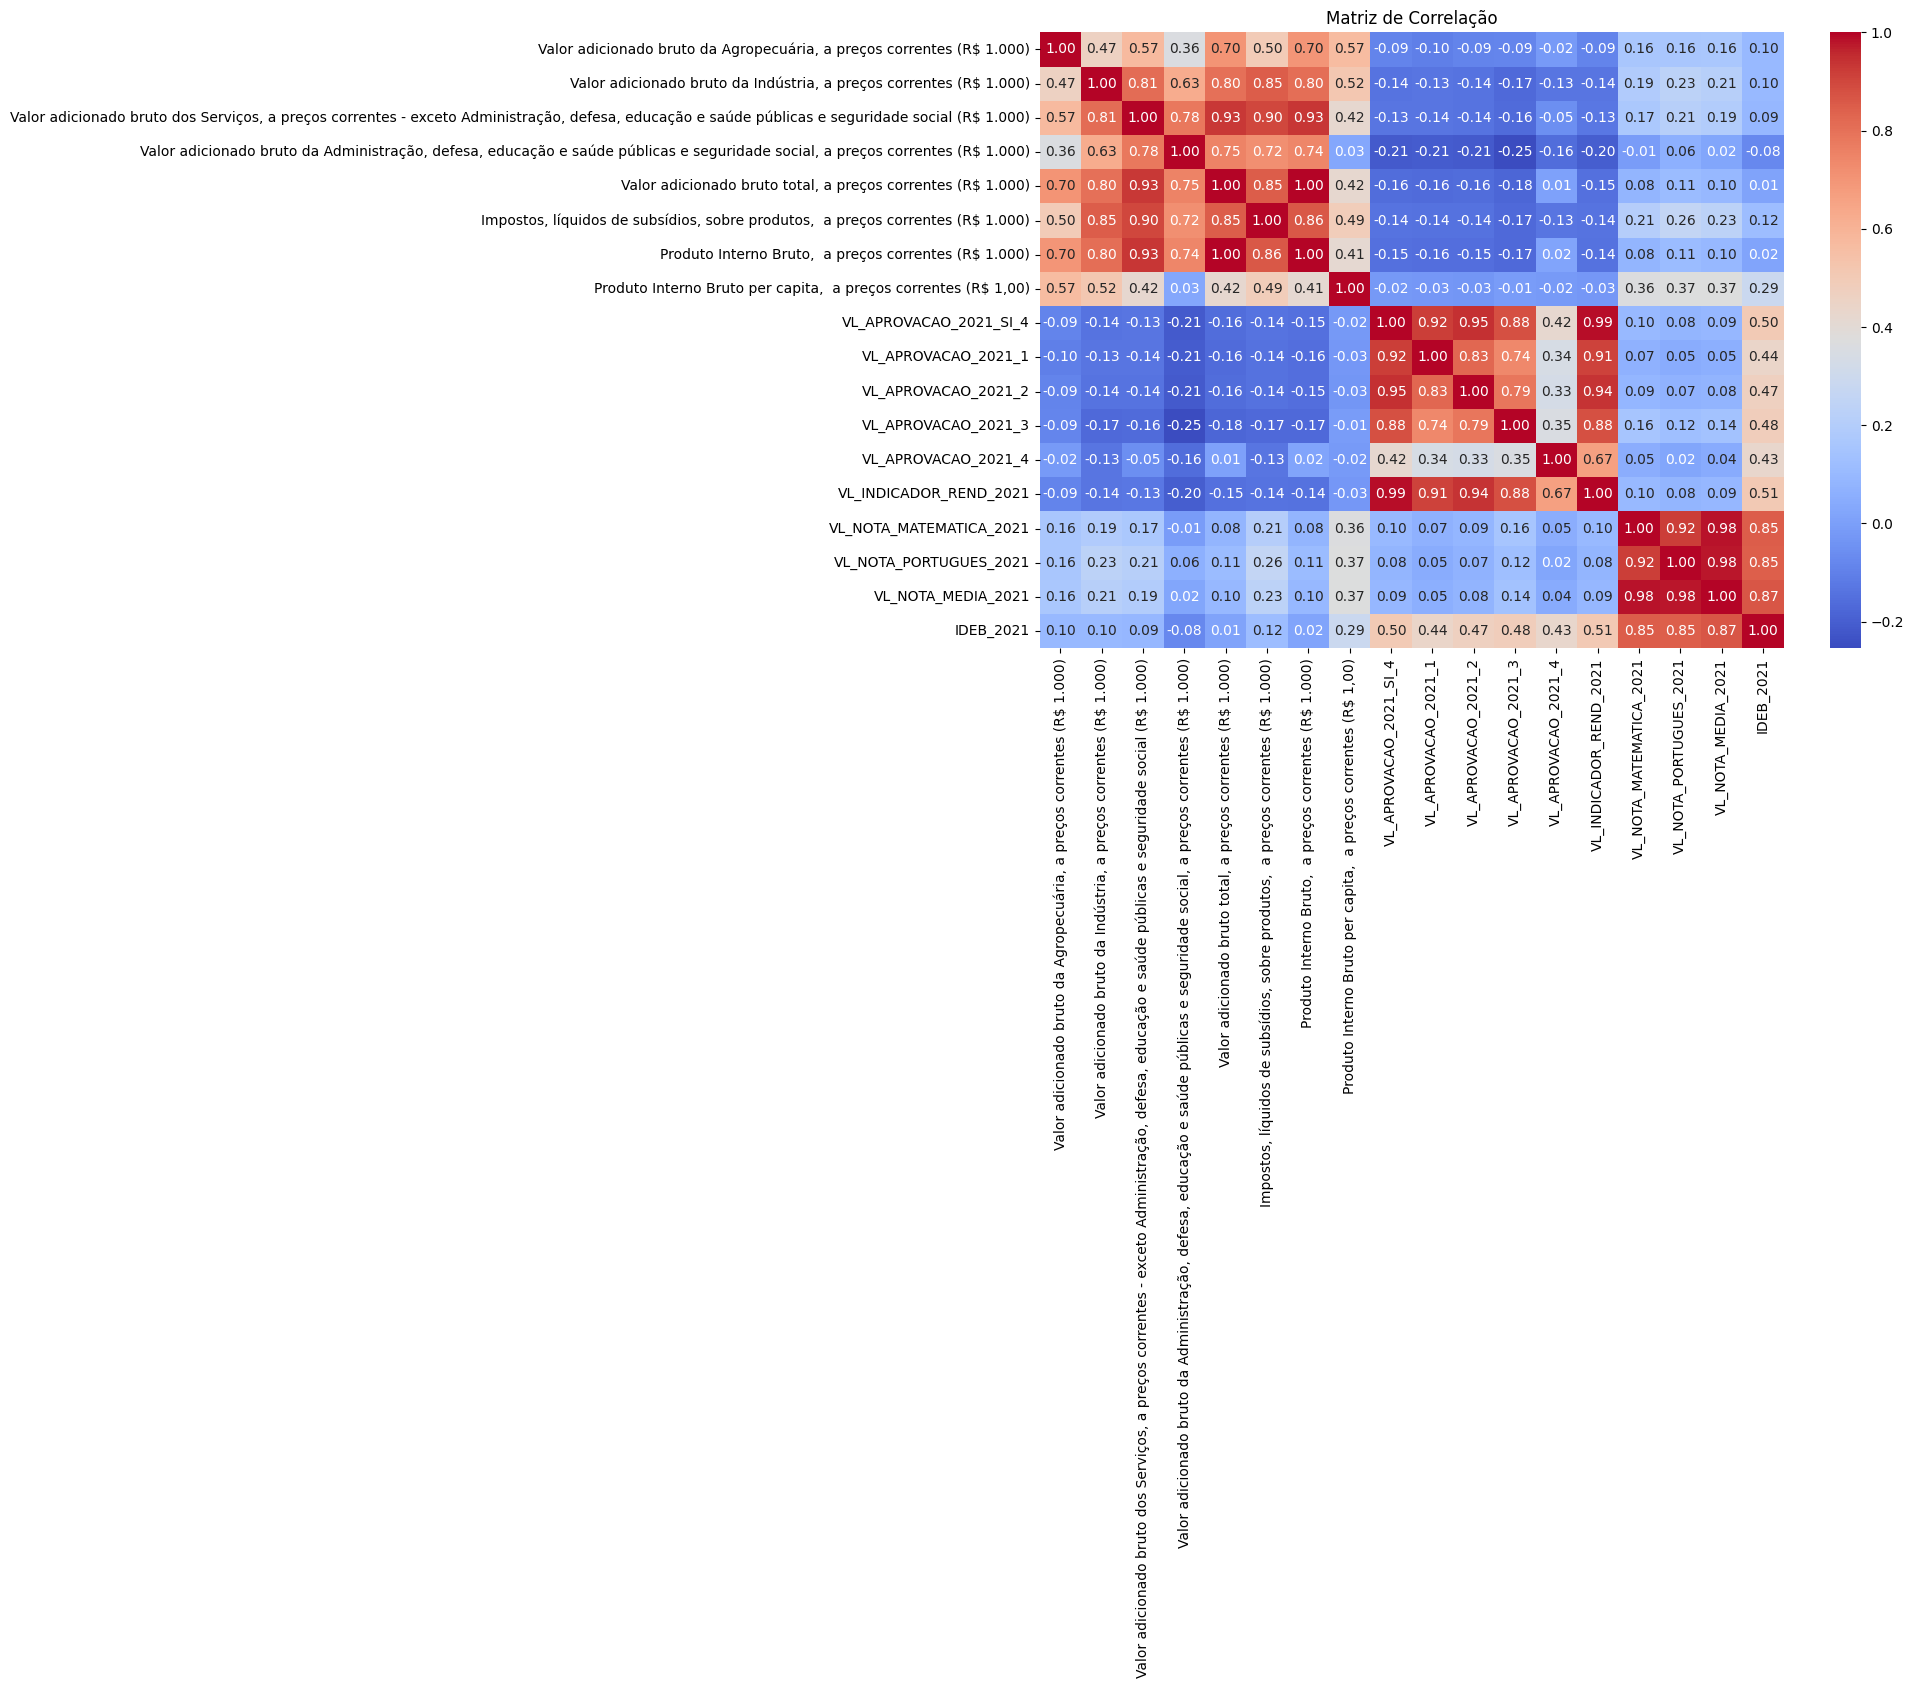

In [15]:
plt.figure(figsize=(12, 8))
sns.heatmap(matriz, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlação")
plt.show()